In [20]:
import glob
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

In [21]:
images_list = []
images_list = glob.glob(os.path.join('C:/Users/ASUS ZENBOOK/PycharmProjects/pythonProject/dataset/cat','*.jpg'))
images_list2 = glob.glob(os.path.join('C:/Users/ASUS ZENBOOK/PycharmProjects/pythonProject/dataset/dog','*.jpg'))

labels = []
for i in range(len(images_list)):
    labels.append(True)
for i in range(len(images_list2)):
    labels.append(False)

for i in images_list2:
    images_list.append(i)

train_list, train_test_val, train_val, test_val = train_test_split(images_list, labels, test_size=0.2, shuffle=True)
test_list, val_list, test, val = train_test_split(train_test_val, test_val, test_size=0.5)

In [22]:
print(len(images_list))
print(images_list[:5])
print(len(train_list),'\t',len(train_list)/len(images_list)*100,"%")
print(len(test_list),'\t',len(test_list)/len(images_list)*100,"%")
print(len(val_list),'\t',len(val_list)/len(images_list)*100,"%")

2000
['C:/Users/ASUS ZENBOOK/PycharmProjects/pythonProject/dataset/cat\\0001.jpg', 'C:/Users/ASUS ZENBOOK/PycharmProjects/pythonProject/dataset/cat\\0002.jpg', 'C:/Users/ASUS ZENBOOK/PycharmProjects/pythonProject/dataset/cat\\0003.jpg', 'C:/Users/ASUS ZENBOOK/PycharmProjects/pythonProject/dataset/cat\\0004.jpg', 'C:/Users/ASUS ZENBOOK/PycharmProjects/pythonProject/dataset/cat\\0005.jpg']
1600 	 80.0 %
200 	 10.0 %
200 	 10.0 %


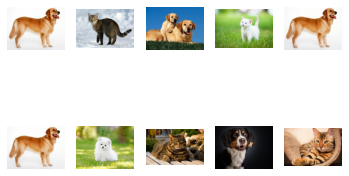

In [23]:
random_idx = np.random.randint(1,len(images_list),size=10)
fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1
    plt.axis('off')
plt.show()

In [24]:
class ADataset(torch.utils.data.Dataset):

    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform

    # dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength

    # load an one of images
    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        # print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img.convert("RGB"))  #

        label = img_path.split('/')[-1].split('\\')[0]
        if label == 'cat':
            label = 0
        elif label == 'dog':
            label = 1

        return img_transformed, label


In [25]:
func_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
  
train_data = ADataset(train_list, transform=func_transforms)
test_data = ADataset(test_list, transform=func_transforms)
val_data = ADataset(val_list, transform=func_transforms)

In [26]:
print(train_data[1])
print(val_data[0][1])

(tensor([[[0.6627, 0.6627, 0.6706,  ..., 0.1412, 0.1529, 0.1529],
         [0.6549, 0.6549, 0.6627,  ..., 0.1451, 0.1569, 0.1569],
         [0.6392, 0.6392, 0.6471,  ..., 0.1569, 0.1647, 0.1647],
         ...,
         [0.7765, 0.7765, 0.7843,  ..., 0.3569, 0.3412, 0.3373],
         [0.7843, 0.7843, 0.7882,  ..., 0.3569, 0.3373, 0.3333],
         [0.7843, 0.7843, 0.7922,  ..., 0.3569, 0.3373, 0.3333]],

        [[0.7608, 0.7608, 0.7608,  ..., 0.2745, 0.2863, 0.2863],
         [0.7529, 0.7529, 0.7529,  ..., 0.2824, 0.2902, 0.2902],
         [0.7294, 0.7294, 0.7294,  ..., 0.2980, 0.3059, 0.3059],
         ...,
         [0.7961, 0.7961, 0.8000,  ..., 0.3608, 0.3412, 0.3412],
         [0.8000, 0.8000, 0.8078,  ..., 0.3608, 0.3373, 0.3333],
         [0.8000, 0.8000, 0.8078,  ..., 0.3608, 0.3373, 0.3333]],

        [[0.5137, 0.5137, 0.5176,  ..., 0.1961, 0.2078, 0.2078],
         [0.5059, 0.5059, 0.5059,  ..., 0.1961, 0.2078, 0.2078],
         [0.4784, 0.4784, 0.4784,  ..., 0.1961, 0.2039, 0

In [27]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method

In [28]:
train_loader = DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = DataLoader(dataset = val_data, batch_size=batch_size, shuffle=True )
test_loader = DataLoader(dataset = test_data, batch_size=batch_size, shuffle=True )

In [29]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

1600 16
200 2


torch.Size([3, 224, 224])

In [30]:
class Cnn(nn.Module):

    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = torch.nn.Flatten()(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return torch.nn.Sigmoid()(out)

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)

In [32]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

In [33]:
accuracy_values = []
loss_values = []
val_accuracy_values = []
val_loss_values = []
model.train()
def train_loop(train_loader, val_loader):
    epochs = 10
    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0
        
        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)
            
            output = model(data)
            loss = criterion(output, label)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)  
        print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
        accuracy_values.append(float(epoch_accuracy))
        loss_values.append(float(epoch_loss))
        model.eval()
        with torch.no_grad():
            
            epoch_val_accuracy=0
            epoch_val_loss =0
            for data, label in val_loader:
                data = data.to(device)
                label = label.to(device)
                
                val_output = model(data)
                val_loss = criterion(val_output,label)
                
                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader)
                epoch_val_loss += val_loss/ len(val_loader)
                
            val_accuracy_values.append(float(epoch_val_accuracy))
            val_loss_values.append(float(epoch_val_loss))
            print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))
            print('\n')

In [34]:
train_loop(train_loader, val_loader)

Epoch : 1, train accuracy : 0.5406249761581421, train loss : 0.6719741821289062
Epoch : 1, val_accuracy : 0.4399999976158142, val_loss : 0.7038691639900208


Epoch : 2, train accuracy : 0.5543749928474426, train loss : 0.6798446774482727
Epoch : 2, val_accuracy : 0.7049999833106995, val_loss : 0.6681423187255859


Epoch : 3, train accuracy : 0.64000004529953, train loss : 0.6545562148094177
Epoch : 3, val_accuracy : 0.6949999928474426, val_loss : 0.6499320864677429


Epoch : 4, train accuracy : 0.6856250166893005, train loss : 0.6300666928291321
Epoch : 4, val_accuracy : 0.7300000190734863, val_loss : 0.6091535091400146


Epoch : 5, train accuracy : 0.7175000309944153, train loss : 0.612375020980835
Epoch : 5, val_accuracy : 0.6949999928474426, val_loss : 0.6216088533401489


Epoch : 6, train accuracy : 0.73499995470047, train loss : 0.5962049961090088
Epoch : 6, val_accuracy : 0.7400000095367432, val_loss : 0.5904723405838013


Epoch : 7, train accuracy : 0.7574999928474426, train los

In [35]:
def accuracy(train, val):
    plt.figure(figsize=(15, 5))
    plt.plot(range(len(train)), train, color="green")
    plt.plot(range(len(val)), val, color="red")
    plt.legend(["Train accuracy", "Valid accuracy"])
    plt.show()



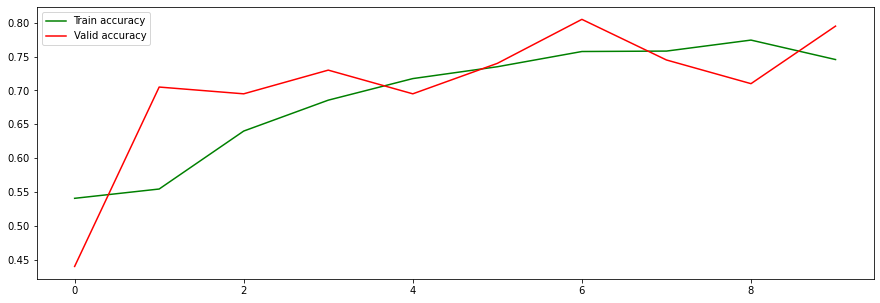

In [36]:
accuracy(accuracy_values, val_accuracy_values)

In [37]:
def loss(train, val):
    plt.figure(figsize=(15, 5))
    plt.plot(range(len(train)), [float(value) for value in train], color="blue")
    plt.plot(range(len(val)), [float(value) for value in val], color="orange")
    plt.legend(["Train loss", "Valid loss"])
    plt.show()

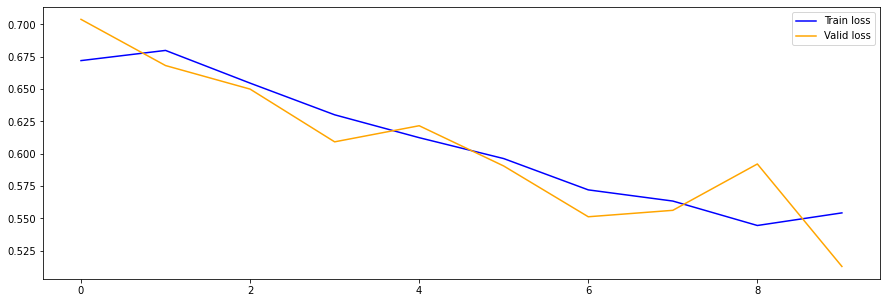

In [38]:
loss(loss_values, val_loss_values)

tho
